## The optimal number of clusters in k-means method:

### Artificial example

In [108]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 1000, centers = 4, n_features=2, shuffle=True, random_state=12345)

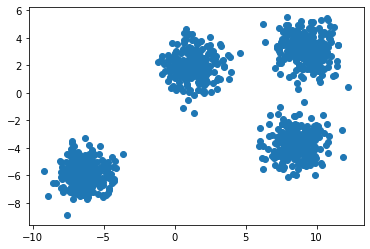

In [109]:
plt.scatter(x[:,0],x[:,1])

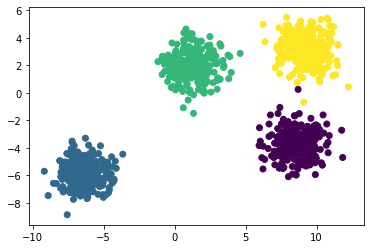

In [110]:
plt.scatter(x[:,0],x[:,1], c=y)

### Elbow method

#### Inertia = within-cluster sum-of-squares

In [112]:
from sklearn.cluster import KMeans

wsse = []   
kmax = 15

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    wsse.append(kmeans.inertia_)

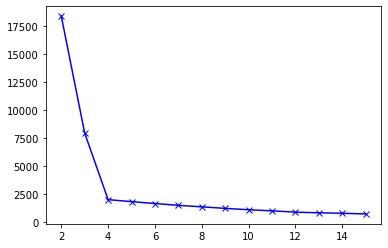

In [113]:
plt.plot(range(2, kmax+1), wsse, 'bx-')

### Silhouette method

##### The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples. To obtain the values for each sample, use silhouette_samples.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [115]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

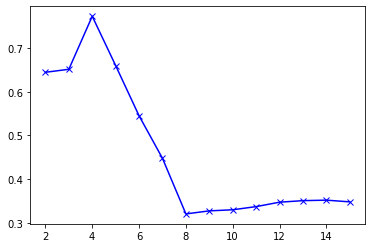

In [116]:
plt.plot(range(2, kmax+1), sil, 'bx-')

## RFM Segmentation

In [127]:
import pandas as pd
import datetime as dt

In [123]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [124]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [154]:
calculating_date = max(df.InvoiceDate) + dt.timedelta(days = 1)
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
data = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (calculating_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

data.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [145]:
recency_labels = range(5, 0, -1)
frequency_labels = range(1, 6)

recency_groups = pd.qcut(data['Recency'], q=5, labels=recency_labels)    
frequency_groups = pd.qcut(data['Frequency'], q=5, labels=frequency_labels)

data = data.assign(R=recency_groups.values, F=frequency_groups.values)   
monetary_labels = range(1, 6)
monetary_groups = pd.qcut(data['MonetaryValue'], q=5, labels=monetary_labels)

data = data.assign(M=monetary_groups)

In [153]:
data.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,5,5,5
12348.0,75,31,1797.24,2,3,4
12349.0,19,73,1757.55,4,4,4
12350.0,310,17,334.40,1,2,2


(array([1933.,  801.,  350.,  238.,  228.,  188.,  189.,  164.,  145.,
         136.]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <a list of 10 Patch objects>)

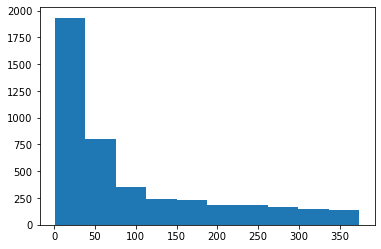

In [146]:
plt.hist(data['Recency'])

(array([4.343e+03, 1.900e+01, 4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 7.9920e+02, 1.5974e+03, 2.3956e+03, 3.1938e+03,
        3.9920e+03, 4.7902e+03, 5.5884e+03, 6.3866e+03, 7.1848e+03,
        7.9830e+03]),
 <a list of 10 Patch objects>)

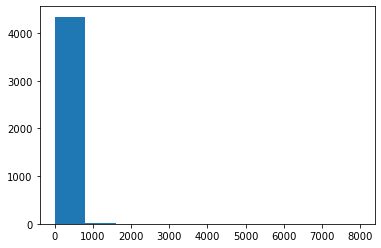

In [147]:
plt.hist(data['Frequency'])

(array([4.338e+03, 2.000e+01, 7.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ -4287.63 ,  24090.035,  52467.7  ,  80845.365, 109223.03 ,
        137600.695, 165978.36 , 194356.025, 222733.69 , 251111.355,
        279489.02 ]),
 <a list of 10 Patch objects>)

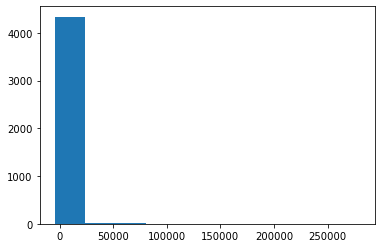

In [148]:
plt.hist(data['MonetaryValue'])

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)
data_normalized = scaler.transform(data)
data_normalized = pd.DataFrame(data=data_normalized, index=data.index, columns=data.columns)

In [156]:
from sklearn.cluster import KMeans

wsse = []    
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(data_normalized)
    wsse.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil.append(silhouette_score(data_normalized, labels, metric = 'euclidean'))

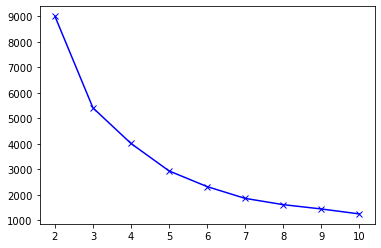

In [157]:
plt.plot(range(2, kmax+1), wsse, 'bx-')

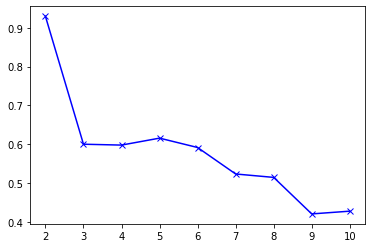

In [158]:
plt.plot(range(2, kmax+1), sil, 'bx-')

# Nonparametric survival models

## Kaplan-Meier estimator in Python

In [1]:
import lifelines

In [2]:
from lifelines.datasets import load_lymphoma
df = load_lymphoma()

In [3]:
df.head()

,Stage_group,Time,Censor
0,1,6,1
1,1,19,1
2,1,32,1
3,1,42,1
4,1,42,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
Stage_group    80 non-null int64
Time           80 non-null int64
Censor         80 non-null int64
dtypes: int64(3)
memory usage: 2.0 KB


In [9]:
df.Stage_group.unique()

array([1, 2], dtype=int64)

In [11]:
df.Censor.unique()

array([1, 0], dtype=int64)

In [12]:
df.describe()

,Stage_group,Time,Censor
count,80.000000,80.000000,80.00000
mean,1.762500,121.475000,0.67500
std,0.428236,107.761454,0.47133
min,1.000000,4.000000,0.00000
25%,2.000000,31.750000,0.00000
50%,2.000000,83.500000,1.00000
75%,2.000000,208.000000,1.00000
max,2.000000,346.000000,1.00000


In [16]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(df['Time'], event_observed=df['Censor'])  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 80 total observations, 26 right-censored observations>

In [17]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.987500
6.0,0.962500
10.0,0.950000
11.0,0.912500
...,...
316.0,0.272364
335.0,0.272364
341.0,0.272364


In [18]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000000
4.0,0.012500
6.0,0.037500
10.0,0.050000
11.0,0.087500
...,...
316.0,0.727636
335.0,0.727636
341.0,0.727636


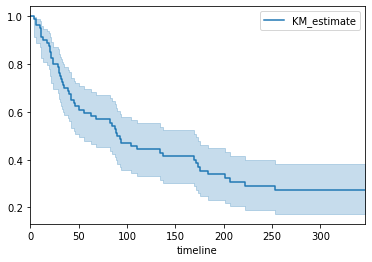

In [19]:
kmf.plot_survival_function() # or just kmf.plot()

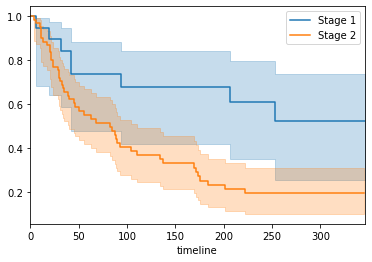

In [26]:
kmf.fit(df['Time'][df['Stage_group']==1], df['Censor'][df['Stage_group']==1], label='Stage 1')
ax = kmf.plot()

kmf.fit(df['Time'][df['Stage_group']==2], df['Censor'][df['Stage_group']==2], label='Stage 2')
ax = kmf.plot(ax=ax)

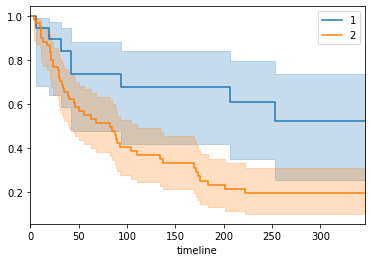

In [33]:
import matplotlib.pyplot as plt
ax = plt.subplot(111)
for name, grouped_df in df.groupby('Stage_group'):
    kmf.fit(grouped_df['Time'], grouped_df['Censor'], label=name)
    kmf.plot(ax=ax)

## Nelson-Aalen estimator

In [37]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(df['Time'], event_observed=df['Censor'])

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 80 total observations, 26 right-censored observations>

In [39]:
naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
4.0,0.012500
6.0,0.037979
10.0,0.050966
11.0,0.090970
...,...
316.0,1.281192
335.0,1.281192
341.0,1.281192


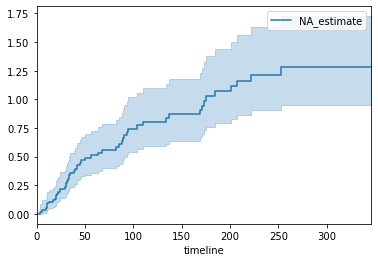

In [41]:
naf.plot()

# Parametric survival models

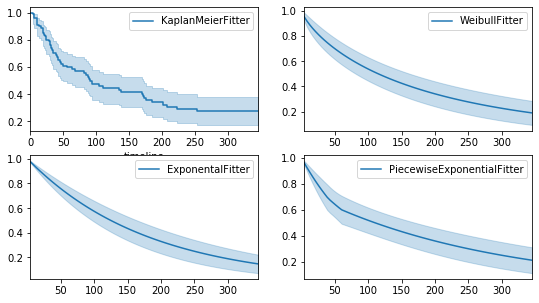

In [36]:
from lifelines import *

fig, axes = plt.subplots(2, 2, figsize=(9, 5))

kmf = KaplanMeierFitter().fit(df['Time'], df['Censor'], label='KaplanMeierFitter')
wbf = WeibullFitter().fit(df['Time'], df['Censor'], label='WeibullFitter')
exf = ExponentialFitter().fit(df['Time'], df['Censor'], label='ExponentalFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(df['Time'], df['Censor'], label='PiecewiseExponentialFitter')

kmf.plot_survival_function(ax=axes[0][0])
wbf.plot_survival_function(ax=axes[0][1])
exf.plot_survival_function(ax=axes[1][0])
pwf.plot_survival_function(ax=axes[1][1])